<div style="font-size: 3em; font-weight: bold; text-align: center;">Recurrent Neural Networks</div>
<div style="text-align: right; font-size: 24px; margin-right: 10px;">Guillermo Díaz Aguado</div>


# Introducción.
Las demás arquitecturas neuronales trabajadas son diseñadas para datos multidimensionales donde <u>no hay ningún orden</u> y <u>el número de dimensiones está fijo</u>.
Pero hay otros campos donde **el orden** es importante como:
* *Time series*. Si cambiamos el orden temporal de los valores, se pierde el hilo. Un punto importante es que las observaciones son parecidas a la observacion anterior.
* *Texto*. Debe seguir un orden para que la frase tenga sentido y el sentido que queremos darle. 
* *Biological data*. ADN...

Las **Redes Neuronales Recurrentes** son una familia especializada en **procesar datos secuenciales**. 

Para entender este tipo de redes neuronales debemos tener en cuenta una nueva idea: **Compartir parametros entre diferentes partes del modelo**. 

Una Red Neuronal Recurrente procesa las seceuncias mediante la iteración de los elementos de la secuencia y guardando un **estado** que contiene información de lo que ya se ha visto en los puntos anteriores de la secuencia.

Las RNN tienen un **loop** que es donde se encuentra la recurrencia.
El **estado** de las secuencias se resetea al procesar diferentes secuencias, así que podemos considerar cada secuencia como una entrada nueva.

## Definiciones iniciales:
* Secuencia de datos: $\mathbf{x}^{t}$
    * Time step: $t$
    * Secuencia que va desde 1 a $\tau$

# 1. Computational Graphs. 
## 1.1. Unfolding Computational Graphs.
Un **gráfico computacional** es la forma de formalizar la estructura de un conjunto de computaciones. La idea de **desenvolver** una *computación recursiva o recurrente* en un gráfico computacional que tiene una estructura repetitiva, típicamente correspone a una *cadena de eventos*.

Pongamos como ejemplo intuitivo de una función dinámica tradicional para entender la estructura de las RNN:
$$
s^{(t)}=f(s^{(t-1)}, x^{(t)};\theta)
$$
Donde $x{(t)}$ es una señal externa.

Si queremos saber como sería la función para un $\tau =3$ la ecuación se quedaría:
$$
s^{(3)}=f(s^{(2)}, x^{(2)};\theta)=f(f(s^{(1)}, x^{(1)};\theta), x^{(2)};\theta)
$$

Podemos dibujarlo como un gráfico, donde mi preferido es el izquierdo: 
<div style="text-align:center;">
    <img src="Imagenes_RNN/Grafico_RNN.png">
</div>


## 1.2. Recurrent Neural Network Computational Graph.
Algunos de los diseños de patrones más importantes para redes neuronales recurrentes son los siguientes:


### 1.2.1 RNN Many-to-Many
Redes recurrentes que producen una salida a cada paso y tiene conexiones recurrentes entre las neuronas ocultas. 
<div style="text-align:center;">
    <img src="Imagenes_RNN/RNN_Many_to_Many.png">
</div>

* $\mathbf(y)$: Target/Objetivo
* $\mathbf(L)$: Función de perdida
* $\mathbf(o)$: Capa de Salida
    * $\mathbf(V)$: Matriz de pesos de capa de salida
* $\mathbf(h)$: Capas ocultas
    * $\mathbf(W)$: Matriz de pesos de capas ocultas **con conexión recurrente**
* $\mathbf(x)$: Capa de Entrada
    * $\mathbf(U)$: Matriz de pesos de entrada. Suele ser matriz Unitaria

En esta estructura, podemos ver que <u>conexiones recurrentes entre las conexiones ocultas</u> las cuales están parametrizadas por una matriz de pesos $\mathbf(W)$.



### 1.2.2 Output Feedback RNNs. Redes con retroalimentación de salida 
Redes recurrentes que producen una salida a cada paso y tiene conexiones recurrentes que proviene solo de la señal de salida y va hacía las neuronas ocultas.
<div style="text-align:center;">
    <img src="Imagenes_RNN/RNN_Output_feedback.png">
</div>

* $\mathbf(y)$: Target/Objetivo
* $\mathbf(L)$: Función de perdida
* $\mathbf(o)$: Capa de Salida
    * $\mathbf(V)$: Matriz de pesos de capa de salida
* $\mathbf(h)$: Capas ocultas
    * $\mathbf(W)$: Matriz de pesos de capas ocultas **con conexión recurrente a la capa de salida anterior**
* $\mathbf(x)$: Capa de Entrada
    * $\mathbf(U)$: Matriz de pesos de entrada. Suele ser matriz Unitaria



La red que solo tiene conexiones recurrentes desde la salida de el paso anterior a la capa oculta del siguiente paso es estrictamente menos poderosa porque no tinen conexiones recurrentes entre las capas ocultas.

Como las capas oculatas no tienen recurrencia, se necesita que la capa de salida capture toda la información sobre el pasado, y esta información será usada para predecir el futuro. Pero como las salidas están entrenadas especificamente para coincidir con los *target*.

La ventaja de eliminar la recurrencia de las capas ocultas es que los pasos de tiempo están desacoplados, por lo que se puede hacer el trabajo en paralelo.



### 1.2.3 RNN Many-to-One
Redes recurrentes con conexiones recurrentes entre neuronas oculatas que leen la secuencia entera y devuleven una única salida.
<div style="text-align:center;">
    <img src="Imagenes_RNN/RNN_Many_to_One.png">
</div>


### 1.2.4 Teacher forcing 
Los modelos que tienen conexiones recurrentes desde las capas de salida son entrenados con **teacher forcing**.

**Teacher forcing** es un procedimiento donde en el proceso de entrenamiento, el modelo recibe como una entrada la salida verdadera de $y^t$ en el momento $t+1$.

Este método proviene del *maximum likehood criterion*:
$$
\text{log}p(y^1, y^2 | x^1, x^2)=\text{log}p(y^2|y^1, x^1, x^2)+ \text{log}p(y^1 | x^1, x^2)
$$

Podemos entender lo anterior como: el modelo está entrenado para maximizar la *probabilidad condicional* de y^2, sabiendo x^1, x^2, y^1. **Maximum likehood** especifica que durante el entrenamiento, en vez de usar nuestros propios valores de salida para la conexión recurrente, usaremos mejor el valor real de salida

## 1.3 Bidirectional RNNs
Todas las RNN que hemos estudiado hasta ahora solo capturan información de entradas del pasado, ($x^{t-1}, x^{t-2} ...$), de entradas actuales ($x^t$) e incluso valores de *target* pasados ($y^{t-1}, y^{t-2} ...$). Pero habrá alguna ocasión donde querramos tener como entrada **toda la secuencia de entrada**. Por ejemplo: cuando intentamos reconocer un fonema al hablar, es útil saber que parte sigue de la palabra...

Las **Bidirectional RNN** combinan una RNN que se mueva hacia delante en el tiempo, con otra RNN que se mueva marcha atras en el tiempo. Esto permite que las capas de salida computen una representación que dependa del pasado y del futuro.

## 1.4 Encoder-Decoder Sequence-to-Sequence
La arquitectura *RNN encoder-decoder sequence-to-sequence*. Estará compuesta por:
* **encoder/reader/input RNN** que procesa la secuencia de entrada.
* El encoder da como salida un **contexto: C** que resumirá la secuencia de entrada.
* **decoder/writer/output RNN** usará el contexto **C** como valores de entrada y nos generará una salida.

La parte nueva de estas arquitecturas es que la <u> longitud de entrada no tiene por qué ser igual </u>


## 1.5. Tipos de capas recurrentes

### LSTM
Long Short Term Memory

Este tipo de recurrencia ayuda a evitar el problema de [vanishing/exploding gradient](#23-the-vanishingexploding-gradient-problem), usando un canal de memoria "común" a cada iteracción.

La idea principal es que usaremos dos canales:
* **Short Term Memories**. Un canal de recurrencia entre todas las salidas de las capas oucltas. Llamado **Hidden State**. Este canal tiene *weights* y *bias* que pueden modificar su valor. 
* **Long Term Memories**. Un canal común que lleve la memoria de todas las interacciones. Llamado **Cell State**. Este canal no tiene *weights* ni *bias*, solo lleva la información que se le es añadida. La falta de estos parametros permite a las memorias fluir por toda la serie sin que le afecte el problema del gradiente explosivo/desvanecido
<div style="text-align:center;">
    <img src="Imagenes_RNN/LSTM_canales.png" width="60%">
</div>

Se dividirá en 5 pasos:
<div style="text-align:center;">
    <img src="Imagenes_RNN/LSTM_esquema.png" width="60%">
</div>

La línea verde de arriba representa el **Cell State** o la memoria a largo plazo. Como hemos dicho antes, no tiene ni pesos ni bias, es por ello que fluye la información de todos los pasos. Pero aunque no tenga estos parametros, no significa que ese valor se pase sin ser modificado, a medida que pasa por cada paso se va reevaluando el valor que lleva esta linea.

La línea rosa representa el **Hidden State** o la memoria a corto plazo, la cuál si será modificada por pesos y bias. 

Por último veremos que hay funciones de activación.
* La función *sigmoide* será usada para aplanar la entrada y como nos da valores entre 0 y 1, serán usadas para todas las opercaciones relacionadas con porcentajes. 
* La función *tanh* también aplanará la entrada y como nos da valores entre -1 y 1, serán usadas para las operaciones que se utilicen para sumar valores. Así si la entrada es muy pequeña, el valor sumado será negativo.

#### El porcentaje que recordaremos. -> Forget Gate 
<div style="text-align:center;">
    <img src="Imagenes_RNN/LSTM_record_longterm.png" height="500px">
</div>

Para determinar cuanto porcentaje de la memoria a largo plazo vamos a necesitar, usaremos una función lineal donde las entradas serán la memoria a corto plazo y los valores de entrada de la variable independiente. Después le aplicaremos la función *sigmoide* para tener el **% Long-Term to Remember**. 

#### Actualización de la memoria a largo plazo. -> Input Gate
<div style="text-align:center;">
    <img src="Imagenes_RNN/LSTM_update_longterm.png" height="500px">
</div>

Como vemos tenemos dos bloques. 
* Bloque verde: Combina el termino a corto plazo y la entrada para crear el **% Potential Memory to remember**
* Bloque naranja: Combina el termino a corto plazo y la entrada para crear un **Potential Long Term Memory**

Multiplicamos ambos bloques para sumarselo al término a largo plazo. Consiguiendo así el **New Long-Term Memory** 

#### Actualización de la memoria a corto plazo. -> Input Gate
<div style="text-align:center;">
    <img src="Imagenes_RNN/LSTM_update_sortterm.png" height="500px">
</div>

Tendremos el primer bloque que determinará el **% Potential Memory to remember** que usará la memoria a corto plazo y la entrada.
El bloque rosa nos dirá el **Potential Short Term Memory** que usará la nueva memoria a largo plazo. 

Al multiplicar ambos valores tendremos el **New Short-Term Memory** y la **Output** de esta capa. Por lo que ambos valores son el mismo, y cuadra con lo visto en las capas recursivas


<div style="text-align:center;">
    <img src="Imagenes_RNN/LSTM_resumen.png" height="500px">
</div>


### GRU
Primera vez que se nombra este tipo de RNN: [Kyunghyun Cho](https://arxiv.org/abs/1406.1078)

* $r$: reset gate.
* $z$: update gate.
* $\sigma$: Función de activación.
* $[.]_j$: indica el jth elemento.
* $\textbf{x}$: el input
* $\textbf{h}_{t-1}$: Estado previo de la capa oculta.
* $\textbf{W}$: Matriz de Pesos.
* $\textbf{U}$: Matriz de Pesos.

En este tipo de algorítmos tendremos varios estados:
* *Update Gate* $z$:
    * Selecciona si $\textbf{h}$ debe ser actualizado con un nuevo hidden state $\widetilde{h}$

* *Reset Gate* $r$
    * Abierto: Ignora el *previous hidden state*
    * Cerrado: Usa el *previous hidden state*

<div style="text-align:center;">
    <img src="Imagenes_RNN/GRU.png" height="200px">
</div>

#### Update Gate

La *update gate* controla cuanta información del *previous hidden state* se llevará al *current hidden state*. Funciona como una célula de memoria que es capaz de recordar *long-term information*

$$
\textit{z}_j = \sigma([\textbf{W}_{\textit{z}}\textbf{x}]_j+[\textbf{U}_z\textbf{h}_{t-1}]_j)
$$



#### Reset Gate

Cuando la *reset gate=0*: el *hidden state* está forzado a ignorar el *previous hidden state* y resetearse con el input actual. Con esto conseguimos que se **drop** la informaxión irrelevante.

$$
\textit{r}_j = \sigma([\textbf{W}_{\textit{r}}\textbf{x}]_j+[\textbf{U}_r\textbf{h}_{t-1}]_j)
$$


#### Funcionamiento general.

Entonces con las dos puertas, la función de activación para cada unidad oculta será:
$$
h^{t}_j = z_jh_j^{t-1}+(1-z_j)\widetilde{h}_j^t
$$
Donde $\widetilde{h}$ es:
$$
\widetilde{h}^t_j = \phi ([\textbf{Wx}]_j+[\textbf{U}(\textbf{r}\odot \textbf{h}_{t-1})]_j)
$$
Como cada *hidden unit* tiene su respectiva hidden gate y reset gate, cada una será capaz de capturar dependencias en distintos *time scales*.
* Aquellas que son capaces de aprender *short-term dependencies* suelen tener *reset gates* que son más activas.
* Aquellas que son capaces de aprender *long-term dependencies* tendrán sus *update gates* más activas.

# 2. Principios matemáticos

## 2.3 The Vanishing/exploding gradient problem.
* Exploding problem: Ocurre cuando en la recurrencia usamos unos pesos mayores que 1, haciendo que cada vez la señal de recurrencia sea mayor, teniendo cada vez mas importancia en las entradas recurrentes.
* Vanishing problems: Ocurre cuando en las recurrencias usamos unos pesos muy bajos, haciendo que se vaya perdiendo la información de momentos pasados.

## 2.4 Overfitting

### Dropout para RNN
`recurrent_dropout`

Hay que tener cuidado con poner una capa recurrente con un `Dropout`. Puesto que se sabe que aplicar un dropout antes de una capa recurrente obstaculiza el proceso de aprendizaje. 

Una mejor forma de usar `dropout` en las capas recurrentes es **usando el mismo patrón de unidades/neuronas eliminidas**: `dropout mask` para cada *timestep*. Es más, para regularizar las representaciones formadas por las puertas recurrentes, una *temporal dropout mask* se deberían aplicar a las activaciones recurrentes internas de la capa. 

Usando la misma *dropout mask* a todas las *timesteps* permite a la red que se propague correctamente el *learning rate*

Para implementarlo: [dropout](#dropout-y-recurrent_dropout)

# 3. Uso en Keras

## 3.1 Capas Recurrentes
Todas las capas recurrentes en Keras se pueden procesar de dos modos distintos. Para elegir entre estos dos modos debemos modificar el atributo `return_sequences`:

* `return_sequences=TRUE`: Como secuencia de outputs sucesivas para cada paso -> Un tensor de rank-3 de forma (batch_size, timesteps, output_features)
* `return_sequences=False`: Devuelve solo la última salida para cada secuencia de entrada -> Un tensor de rank-2 de la forma (batch_size, output_features)



### `SimpleRNN`
Red Recurrente donde la salida de esta capa será también entrada para esta misma capa en el siguiente paso.
* `nodos`: Número de nodos que tendrá la capa.
* `activation`: Función de activación.

En general, este tipo de capas es demasiado simple para ser usada. `SimpleRNN` tiene un gran problema, y es que aunque teoricamente debería ser capaz de retener la información de pasos que han pasado hace mucho, estas *long-term dependencies* son casi imposibles de aprender. Esto es debido al [Vanishing/exploding gradient problem](#23-the-vanishingexploding-gradient-problem)

### `LSTM`
Long Short-Term Memory (LSTM). Es una variante 

### `Bidirectional`
Este objeto tendrá como primer argumento una instacia de una capa recurrente. El propio objeto `Bidirectional` creará una instancia separada de la capa introducida como argumento, una procesará los datos de forma cronológica y la otra en orden revertido

x = layers.Bidirectional(layers.LSTM(16))(inputs)

### 3.2.2 Parámetros de los Objetos en keras



### `dropout` y `recurrent_dropout`
Todas las capas recurrentes de Keras tienen dos argumentos relacionados con el **dropout**:
* `dropout`: Fracción de las neuronas que se van a *drop* de manera aleatoria para la transformación lineal.
* `recurrent_dropout`: Fracción de las unidades(neuronas) que se van a *drop* para todas las muestras (serán siempre las mismas) para la transformación lineal.

    *recurrent_dropout* no está soportado por cuDNN kernel, ver info en [RNN runtime performance](#rnn-runtime-performance)

    Para mas info sobre el dropout en las capas recurrentes: [dropout en RNN](#dropout-para-rnn)



#### `unroll`
Es un parametro de las capas que desenvuelve un bucle *for* de las redes recurrentes y lo linealiza, consiguiendo así que se puede paralelizar las tareas. 
* `unroll=False` (por defecto)
* `unroll=True`: Habilita el desenrollar.

Este proceso solo es viable si:
* Pequeñas secuencias: alrededor de 100 o menos.
* En la capa `Input` no se puede pasar un `shape=None`

## 3.3 RNN runtime performance
RNN con pocos parámetros tienden a ser más rápidos en una CPU que en una GPU, puesto que tiene pocos cálculos que hacer de forma paralela. 

Para que Tensorflow pueda hacer estos procesos en paralelo, depende de un **cuDNN kernel**. Este es una bendición y una maldición: son rápidos pero inflexibles. Si haces algo que no soporte, hará que procesemos el código con la implementación normal de Tensorflow (el cual es 2-5 veces más lento).

Usualmente podremos usar cuDNN kernels si nuestro modelo es sencillo y no tiene muchos parámetros. 

En caso de usar alguno de los siguientes parámetros tendremos que que intentar el [unroll](#unroll):
* recurrent_dropout



## 3.4 Dataset de ejemplo.


In [2]:
import urllib.request
import zipfile

# Descargar el archivo ZIP
url = "https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip"
filename = "jena_climate_2009_2016.csv.zip"
urllib.request.urlretrieve(url, filename)

# Descomprimir el archivo
with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall()

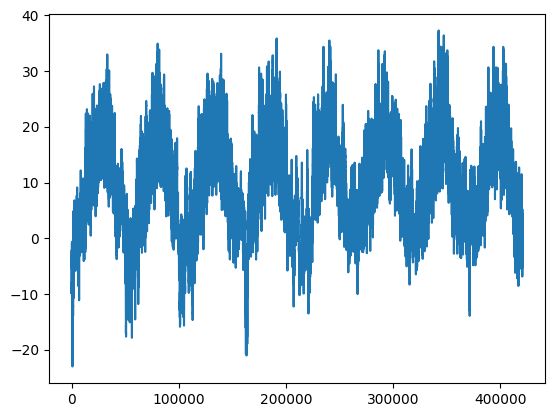

In [4]:
# Leemos el fichero
import os
fname = os.path.join("jena_climate_2009_2016.csv")

with open(fname) as f:
    data = f.read()

lines = data.split("\n")
header = lines[0].split(",")
lines = lines[1:]

# Guardamos los datos en variables
import numpy as np

temperature = np.zeros((len(lines),))
raw_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(",")[1:]]
    temperature[i] = values[1]
    raw_data = values[:]

# Graficamos los datos
import matplotlib.pyplot as plt

plt.plot(range(len(temperature)), temperature)

# Dividimos en train-val-test
## Lo hacemos de este método puesto que queremos la secuencia del 50% primero del dataset
num_train_samples = int(0.5 * len(raw_data))
num_val_samples = int(0.25 * len(raw_data))
num_test_samples = len(raw_data) - num_train_samples - num_val_samples



Nuestro problema será el siguiente: Teniendo los datos de 5 días anteriores, con muestra cada hora, ¿Podremos predecir la temperatura 24h después?

Usaremos el objeto de keras `timeseries_to_dataset_from_array()`

Lo que hace este objeto es dividir en secuencias el array que hayamos introducido, además cada secuencia tendrá como *target* el valor que seguiría a esta.
* `sampling_rate`: Número de observaciones que usaremos de cada x muestras. Ejemplo: si ponemos un *sample_rate* de 3, usaremos 1 de cada 3 muestras en orden.
* `sequence_lenght`: Número de observaciones que tendrá cada secuencia.

In [ ]:
# Normalizamos los datos.
from tensorflow.keras import layers
inputs = layers.Input(shape=)

# Iniciamos training, validation y test
from tensorflow import keras
from tensorflow.keras import layers

sampling_rate = 6
sequence_length = 120
delay = sampling_rate*(sequence_length + 24 - 1)
batch_size = 256

train_dataset = keras.utils.timeseries_datset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=0,
    end_index=num_train_samples)

val_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples,
    end_index=num_train_samples+num_val_samples)

test_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples+num_val_samples,
    end_index=len(raw_data))


Esto nos devolverá una *tupla* de `(samples, targets)` donde tendremos 256 *tuplas* (debidas al bacth_size), dentro las samples serán de tamaño 120 (debido a sequence_length). Como tenemos shuffle, entonces la tupla 1 no tiene por qué estar cerca temporalmente a la tupla 2.

In [ ]:
# Vamos a probar un modelo simple
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
flat = layers.Flatten()(inputs)
hidden_1 = layers.Dense(16, activation="relu")(flat)
outputs = layers.Dense(1)(hidden_1)
model = keras.Model(inputs=inputs, outputs=outputs)

# Pondremos un callback para guardar la mejor perfomance
callbacks = [
    keras.callbacks.ModelCheckpoint("jena_dense.keras",
                                    save_best_only=True)
]

model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset, callbacks=callbacks)

# Vamos a graficar el error en test y en val
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

# Como veremos en la gráfica, no se consigue unos resultados muy buenos. Ya que si usasemos como predicción la media, entonces tendiramos un error de 2,5ºC
